In [1]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import pandas as pd
import numba as nb
import numpy as np
import os
import matplotlib.animation as ma
import seaborn as sns
from AdaptiveInteraction import AdaptiveInteraction2D
from AdaptiveInteraction import StateAnalysis

# 动画和终态

In [21]:
# 本地
if not os.path.exists("data_identicalDis_this"):
    os.makedirs("data_identicalDis_this")
model = AdaptiveInteraction2D(agentsNum=100, dt=0.1, J=0.1, K = -0.4, r_c=0.5,
                              distribution=None, tqdm = True, savePath="data_identicalDis_this")
# model.run(16000)
# model.plot()

In [9]:
# 磁盘

model = AdaptiveInteraction2D(agentsNum=100, dt=0.1, J=0.1, K = -0.1, r_c=0.99,
                              distribution=None, tqdm = True, savePath="F:/adaptive_data/data_Nonedis_Det")


In [22]:
sa = StateAnalysis(model)
sa.draw_mp4()
S = sa.cal_S
R = sa.cal_R
V = sa.cal_V
Gm = sa.find_gamma()
print(S)
print(R)
print(V)
print(Gm)

Please input the savePath


  0%|          | 0/3201 [00:00<?, ?it/s]

0.9738586672932323
0.08937606499333609
0.7493850608982751
0.0


In [ ]:
N = 100
J = 0.1
K = 0.2
range_r_c = np.linspace(0.1, 1, 10)
range_J = np.linspace(0.1, 1, 10)


for r_c in tqdm(range_r_c, desc='r_c'): 
    for J in tqdm(range_J, desc='J'):
        model = AdaptiveInteraction2D(agentsNum=N, dt=0.1, J=J, K = K, r_c=r_c, savePath="data7_model3")
        model.run(3000)

# Final States

In [ ]:
import seaborn as sns
sns.set_theme(font_scale=1.1, rc={
    'figure.figsize': (6, 5),
    'axes.facecolor': 'white',
    'figure.facecolor': 'white',
    'grid.color': '#dddddd',
    'grid.linewidth': 0.5,
    "lines.linewidth": 1.5,
    'text.color': '#000000',
    'figure.titleweight': "bold",
    'xtick.color': '#000000',
    'ytick.color': '#000000'
})

In [ ]:
# 单变量循环
N = 100
J = 0.1
K = 0.2
range_r_c = np.arange(0,1.01,0.05)
fig = plt.figure(figsize=(6, 33))# 横为3，纵为3x21
idx = 1

for r_c in range_r_c:#纵轴
        model = AdaptiveInteraction2D(agentsNum=N, dt=0.1, J=J, K = K,r_c=r_c,
                              distribution="uniform0.1", savePath="F:/adaptive_data/data_U0.1")
        sa = StateAnalysis(model, lookIndex=-1)
        index = -1
        positionX = sa.totalPositionX[index]
        phaseTheta = sa.totalPhaseTheta[index]   
        pointX = sa.totalPointX[index]
        pointTheta = sa.totalPointTheta[index]

        ax = plt.subplot(11, 2, idx)# 21行1列，第idx个
        maxAbsPos = np.max(np.abs(positionX)) 

        # dx = pointX[:, 0]
        # dy = pointX[:, 1]

        # magnitudes = np.sqrt(dx**2 + dy**2)

        # magnitudes[magnitudes == 0] = 1

        # dx_normalized = dx / magnitudes
        # dy_normalized = dy / magnitudes

        # fixed_length = 0.1
        # dx_fixed = dx_normalized * fixed_length
        # dy_fixed = dy_normalized * fixed_length

        # qv = ax.quiver(positionX[:, 0], positionX[:, 1], dx_fixed, dy_fixed, 
        #                phaseTheta, cmap='viridis', clim=(0, 2*np.pi))
        scatter = plt.scatter(positionX[:, 0], positionX[:, 1],
                              c=phaseTheta, cmap='viridis', clim=(0, 2*np.pi))

        ax.set_xlim(-1.1*maxAbsPos, 1.1*maxAbsPos)
        ax.set_ylim(-1.1*maxAbsPos, 1.1*maxAbsPos)
        ax.set_title(f"$\ K={K:.2f}$")

        idx += 1

plt.tight_layout()
plt.show()

In [ ]:
N = 400
J = 0.5
r_c = 0.6
range_K = np.linspace(-1, 1, 21)
# N = 400
# K = -0.5
# range_r_c = np.linspace(0.62,0.70,5)
# range_J = np.linspace(0.92,1.0,5)
fig = plt.figure(figsize=(3, 63))
idx = 1

for K in range_K:#纵轴
        model = AdaptiveInteraction2D(agentsNum=N, dt=0.1, J=J, K = K, r_c=r_c, tqdm=True, savePath="data8_model3")
        sa = StateAnalysis(model, lookIndex=-1)
        index = -1
        positionX = sa.totalPositionX[index]
        phaseTheta = sa.totalPhaseTheta[index]   
        pointX = sa.totalPointX[index]
        pointTheta = sa.totalPointTheta[index]

        ax = plt.subplot(21, 1, idx)
        maxAbsPos = np.max(np.abs(positionX)) 

        dx = pointX[:, 0]
        dy = pointX[:, 1]

        magnitudes = np.sqrt(dx**2 + dy**2)

        magnitudes[magnitudes == 0] = 1

        dx_normalized = dx / magnitudes
        dy_normalized = dy / magnitudes

        fixed_length = 0.1
        dx_fixed = dx_normalized * fixed_length
        dy_fixed = dy_normalized * fixed_length

        qv = ax.quiver(positionX[:, 0], positionX[:, 1], dx_fixed, dy_fixed, 
                       phaseTheta, cmap='viridis', clim=(0, 2*np.pi))

        ax.set_xlim(-1.1*maxAbsPos, 1.1*maxAbsPos)
        ax.set_ylim(-1.1*maxAbsPos, 1.1*maxAbsPos)
        ax.set_title(f"$\ K={K:.2f}$")

        idx += 1

plt.tight_layout()
plt.show()

In [ ]:
# 双变量循环

N = 100
J = 0.1
range_r_c = np.arange(0.91, 1, 0.01)
range_K = np.arange(-1, 1, 0.1)

fig = plt.figure(figsize=(len(range_r_c)*3, len(range_K)*3))
idx = 1

for K in range_K:#纵轴
    for r_c in range_r_c:#横轴
        model = AdaptiveInteraction2D(agentsNum=100, dt=0.1, J=J, K = K, r_c=r_c,
                              distribution=None, tqdm = False, savePath="F:/adaptive_data/data_Nonedis_Det")
        sa = StateAnalysis(model, lookIndex=-1)
        index = -1
        positionX = sa.totalPositionX[index]
        phaseTheta = sa.totalPhaseTheta[index]   
        pointX = sa.totalPointX[index]
        pointTheta = sa.totalPointTheta[index]

        ax = plt.subplot(len(range_K), len(range_r_c), idx)  # 顺序
        maxAbsPos = np.max(np.abs(positionX)) 
        
        scatter = plt.scatter(positionX[:, 0], positionX[:, 1],
                              c=phaseTheta, cmap='viridis', clim=(0, 2*np.pi))
        ax.set_xlim(-1.1*maxAbsPos, 1.1*maxAbsPos)
        ax.set_ylim(-1.1*maxAbsPos, 1.1*maxAbsPos)
        ax.set_title(f"$\ K={K:.2f},\ r_c ={r_c:.2f},$")

        idx += 1

plt.tight_layout()
plt.show()

# order parameter

## S

### 热图和折线图

In [ ]:
def cal_S_matrix(N, K, range_r_c, range_J, savePath):
    S_values = pd.DataFrame(index=range_J, columns=range_r_c)

    for i, r_c in enumerate(range_r_c): 
        for j, J in enumerate(range_J):
            model = AdaptiveInteraction2D(agentsNum=N, dt=0.1, J=J, K = K, r_c=r_c, tqdm=True, savePath="data2")

            targetPath = f"{savePath}/{model}.h5"
            totalPositionX = pd.read_hdf(targetPath, key="positionX")
            totalPhaseTheta = pd.read_hdf(targetPath, key="phaseTheta")
            TNum = totalPositionX.shape[0] // model.agentsNum

            totalPositionX = totalPositionX.values.reshape(TNum, model.agentsNum, 2)
            transient_index = int(0.9*totalPositionX.shape[0])
            totalPosition_x = totalPositionX[:, :, 0][transient_index:-1]
            totalPosition_y = totalPositionX[:, :, 1][transient_index:-1]
            totalPhaseTheta = totalPhaseTheta.values.reshape(
                TNum, model.agentsNum)[transient_index:-1]
            
            phi = np.arctan2(totalPosition_y, totalPosition_x)
            W_plus = np.exp(1j*(phi + totalPhaseTheta))
            W_minus = np.exp(1j*(phi - totalPhaseTheta))

            time_OP_plus = np.abs(W_plus.mean(axis=1))
            time_OP_minus = np.abs(W_minus.mean(axis=1))
            S_plus = time_OP_plus.mean()
            S_minus = time_OP_minus.mean()

            S = max(S_plus, S_minus)

            S_values.loc[J, r_c] = S
    return S_values

def plot_S_matrix(S_values, K):# S_values是一个DataFrame, K是标题名
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(S_values, ax=ax, cmap="viridis", cbar_kws={'label': 'S'}, square=True)
    ax.set_title(f"$K={K}$")
    ax.set_xlabel("$r_c$")
    ax.set_ylabel("$J$")
    plt.tight_layout()
    plt.savefig(f"./biGraph/S_K={K}.png", dpi=200, bbox_inches="tight")
    plt.close()


In [ ]:
N = 200
range_r_c = np.linspace(0.1,1,10)
range_J = np.linspace(0.1,1,10)

S1 = cal_S_matrix(N, -0.5, range_r_c, range_J, "data2")
S2 = cal_S_matrix(N, -1, range_r_c, range_J, "data2")
S3 = cal_S_matrix(N, -2, range_r_c, range_J, "data2")
# S4 = cal_S_matrix(N, 5, range_r_c, range_J, "data2")



In [ ]:
S3

In [ ]:
S1_values = S1.loc[0.6]
S2_values = S2.loc[0.6]
S3_values = S3.loc[0.6]
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(S1_values.index, S1_values.values, marker='o')
ax.plot(S2_values.index, S2_values.values, marker='o')
ax.plot(S3_values.index, S3_values.values, marker='o')
ax.legend(["K=-0.5", "K=-1", "K=-2"])
ax.set_xlabel("$r_c$")
ax.set_ylabel("$S$")
plt.tight_layout()


In [ ]:
fig,axs = plt.subplots(2,2,figsize=(20,20))
S_values_numeric = S1.apply(pd.to_numeric, errors='coerce',)  # Convert non-numeric to NaN
S_values_numeric = S_values_numeric.fillna(0)  # Optional: Replace NaN with 0
ax1 = axs[0,0].matshow(S_values_numeric, cmap='viridis',interpolation='spline16')
axs[0,0].set_xticks(np.arange(len(range_r_c)), range_r_c.round(2))
axs[0,0].set_yticks(np.arange(len(range_J)), range_J.round(2))
axs[0,0].set_xlabel("$r_c$")
axs[0,0].set_ylabel("$J$")
axs[0,0].set_title(f"$S-K={-0.5}$", fontsize=16)
fig.colorbar(ax1, ax=axs[0,0], fraction=0.046, pad=0.04)
axs[0,0].grid(False)

# S_values_numeric = S2.apply(pd.to_numeric, errors='coerce',)  # Convert non-numeric to NaN
# S_values_numeric = S_values_numeric.fillna(0)  # Optional: Replace NaN with 0
# ax2 = axs[0,1].matshow(S_values_numeric, cmap='viridis',interpolation='spline16')
# axs[0,1].set_xticks(np.arange(len(range_r_c)), range_r_c.round(2))
# axs[0,1].set_yticks(np.arange(len(range_J)), range_J.round(2))
# axs[0,1].set_xlabel("$r_c$")
# axs[0,1].set_ylabel("$J$")
# axs[0,1].set_title(f"$S-K={1}$", fontsize=16)
# fig.colorbar(ax2, ax=axs[0,1], fraction=0.046, pad=0.04)

# S_values_numeric = S3.apply(pd.to_numeric, errors='coerce',)  # Convert non-numeric to NaN
# S_values_numeric = S_values_numeric.fillna(0)  # Optional: Replace NaN with 0
# ax3 = axs[1,0].matshow(S_values_numeric, cmap='viridis',interpolation='spline16')
# axs[1,0].set_xticks(np.arange(len(range_r_c)), range_r_c.round(2))
# axs[1,0].set_yticks(np.arange(len(range_J)), range_J.round(2))
# axs[1,0].set_xlabel("$r_c$")
# axs[1,0].set_ylabel("$J$")
# axs[1,0].set_title(f"$S-K={2}$", fontsize=16)
# fig.colorbar(ax3, ax=axs[1,0], fraction=0.046, pad=0.04)

# S_values_numeric = S4.apply(pd.to_numeric, errors='coerce',)  # Convert non-numeric to NaN
# S_values_numeric = S_values_numeric.fillna(0)  # Optional: Replace NaN with 0
# ax4 = axs[1,1].matshow(S_values_numeric, cmap='viridis',interpolation='spline16')
# axs[1,1].set_xticks(np.arange(len(range_r_c)), range_r_c.round(2))
# axs[1,1].set_yticks(np.arange(len(range_J)), range_J.round(2))
# axs[1,1].set_xlabel("$r_c$")
# axs[1,1].set_ylabel("$J$")
# axs[1,1].set_title(f"$S-K={5}$", fontsize=16)
# fig.colorbar(ax4, ax=axs[1,1], fraction=0.046, pad=0.04)




In [ ]:
N = 400
range_K = np.linspace(-1, 1, 21)
r_c = 0.5
J = 0.5
S_values = pd.DataFrame(index=range_K, columns=[0])

for i, K in enumerate(range_K):
    model = AdaptiveInteraction2D(agentsNum=N, dt=0.1, J=J, K = K, r_c=r_c, tqdm=False, savePath="data8_model3")

    targetPath = f"./data8_model3/{model}.h5"
    totalPositionX = pd.read_hdf(targetPath, key="positionX")
    totalPhaseTheta = pd.read_hdf(targetPath, key="phaseTheta")
    TNum = totalPositionX.shape[0] // model.agentsNum

    totalPositionX = totalPositionX.values.reshape(TNum, model.agentsNum, 2)
    transient_index = int(0.9*totalPositionX.shape[0])
    totalPosition_x = totalPositionX[:, :, 0][transient_index:-1]
    totalPosition_y = totalPositionX[:, :, 1][transient_index:-1]
    totalPhaseTheta = totalPhaseTheta.values.reshape(
        TNum, model.agentsNum)[transient_index:-1]
    
    phi = np.arctan2(totalPosition_y, totalPosition_x)
    W_plus = np.exp(1j*(phi + totalPhaseTheta))
    W_minus = np.exp(1j*(phi - totalPhaseTheta))

    time_OP_plus = np.abs(W_plus.mean(axis=1))
    time_OP_minus = np.abs(W_minus.mean(axis=1))
    S_plus = time_OP_plus.mean()
    S_minus = time_OP_minus.mean()

    S = max(S_plus, S_minus)

    S_values.loc[K, 0] = S

# S_values导出为excel
S_values.to_excel("S_values.xlsx")



### S对rc

In [2]:
J = 0.1
range_r_c = np.arange(0,1.01,0.1)
# 设置一个存储R的DataFrame
S_values_1 = pd.DataFrame(index=range_r_c, columns=[0])
S_values_2 = pd.DataFrame(index=range_r_c, columns=[0])
S_values_3 = pd.DataFrame(index=range_r_c, columns=[0])
S_values_4 = pd.DataFrame(index=range_r_c, columns=[0])
S_values_5 = pd.DataFrame(index=range_r_c, columns=[0])
S_values_6 = pd.DataFrame(index=range_r_c, columns=[0])
S_values_7 = pd.DataFrame(index=range_r_c, columns=[0])


for r_c in range_r_c:
    model = AdaptiveInteraction2D(agentsNum=100, dt=0.1, J=J, K = -1, r_c=r_c,
                              distribution=None, savePath="F:/adaptive_data/data_identicalDis")
    sa = StateAnalysis(model)
    S = sa.cal_S
    S_values_1.loc[r_c, 0] = S

for r_c in range_r_c:
    model = AdaptiveInteraction2D(agentsNum=100, dt=0.1, J=J, K = -0.8, r_c=r_c,
                              distribution=None, savePath="F:/adaptive_data/data_identicalDis")
    sa = StateAnalysis(model)
    S = sa.cal_S
    S_values_2.loc[r_c, 0] = S

for r_c in range_r_c:
    model = AdaptiveInteraction2D(agentsNum=100, dt=0.1, J=J, K = -0.6, r_c=r_c,
                              distribution=None, savePath="F:/adaptive_data/data_identicalDis")
    sa = StateAnalysis(model)
    S = sa.cal_S
    S_values_3.loc[r_c, 0] = S

for r_c in range_r_c:   
    model = AdaptiveInteraction2D(agentsNum=100, dt=0.1, J=J, K = -0.4, r_c=r_c,
                              distribution=None, savePath="F:/adaptive_data/data_identicalDis")
    sa = StateAnalysis(model)
    S = sa.cal_S
    S_values_4.loc[r_c, 0] = S

for r_c in range_r_c:
    model = AdaptiveInteraction2D(agentsNum=100, dt=0.1, J=J, K = -0.3, r_c=r_c,
                                distribution=None, savePath="F:/adaptive_data/data_identicalDis")
    sa = StateAnalysis(model)
    S = sa.cal_S
    S_values_5.loc[r_c, 0] = S

for r_c in range_r_c:
    model = AdaptiveInteraction2D(agentsNum=100, dt=0.1, J=J, K = -0.2, r_c=r_c,
                                distribution=None, savePath="F:/adaptive_data/data_identicalDis")
    sa = StateAnalysis(model)
    S = sa.cal_S
    S_values_6.loc[r_c, 0] = S

for r_c in range_r_c:
    model = AdaptiveInteraction2D(agentsNum=100, dt=0.1, J=J, K = -0.1, r_c=r_c,
                                distribution=None, savePath="F:/adaptive_data/data_identicalDis")
    sa = StateAnalysis(model)
    S = sa.cal_S
    S_values_7.loc[r_c, 0] = S




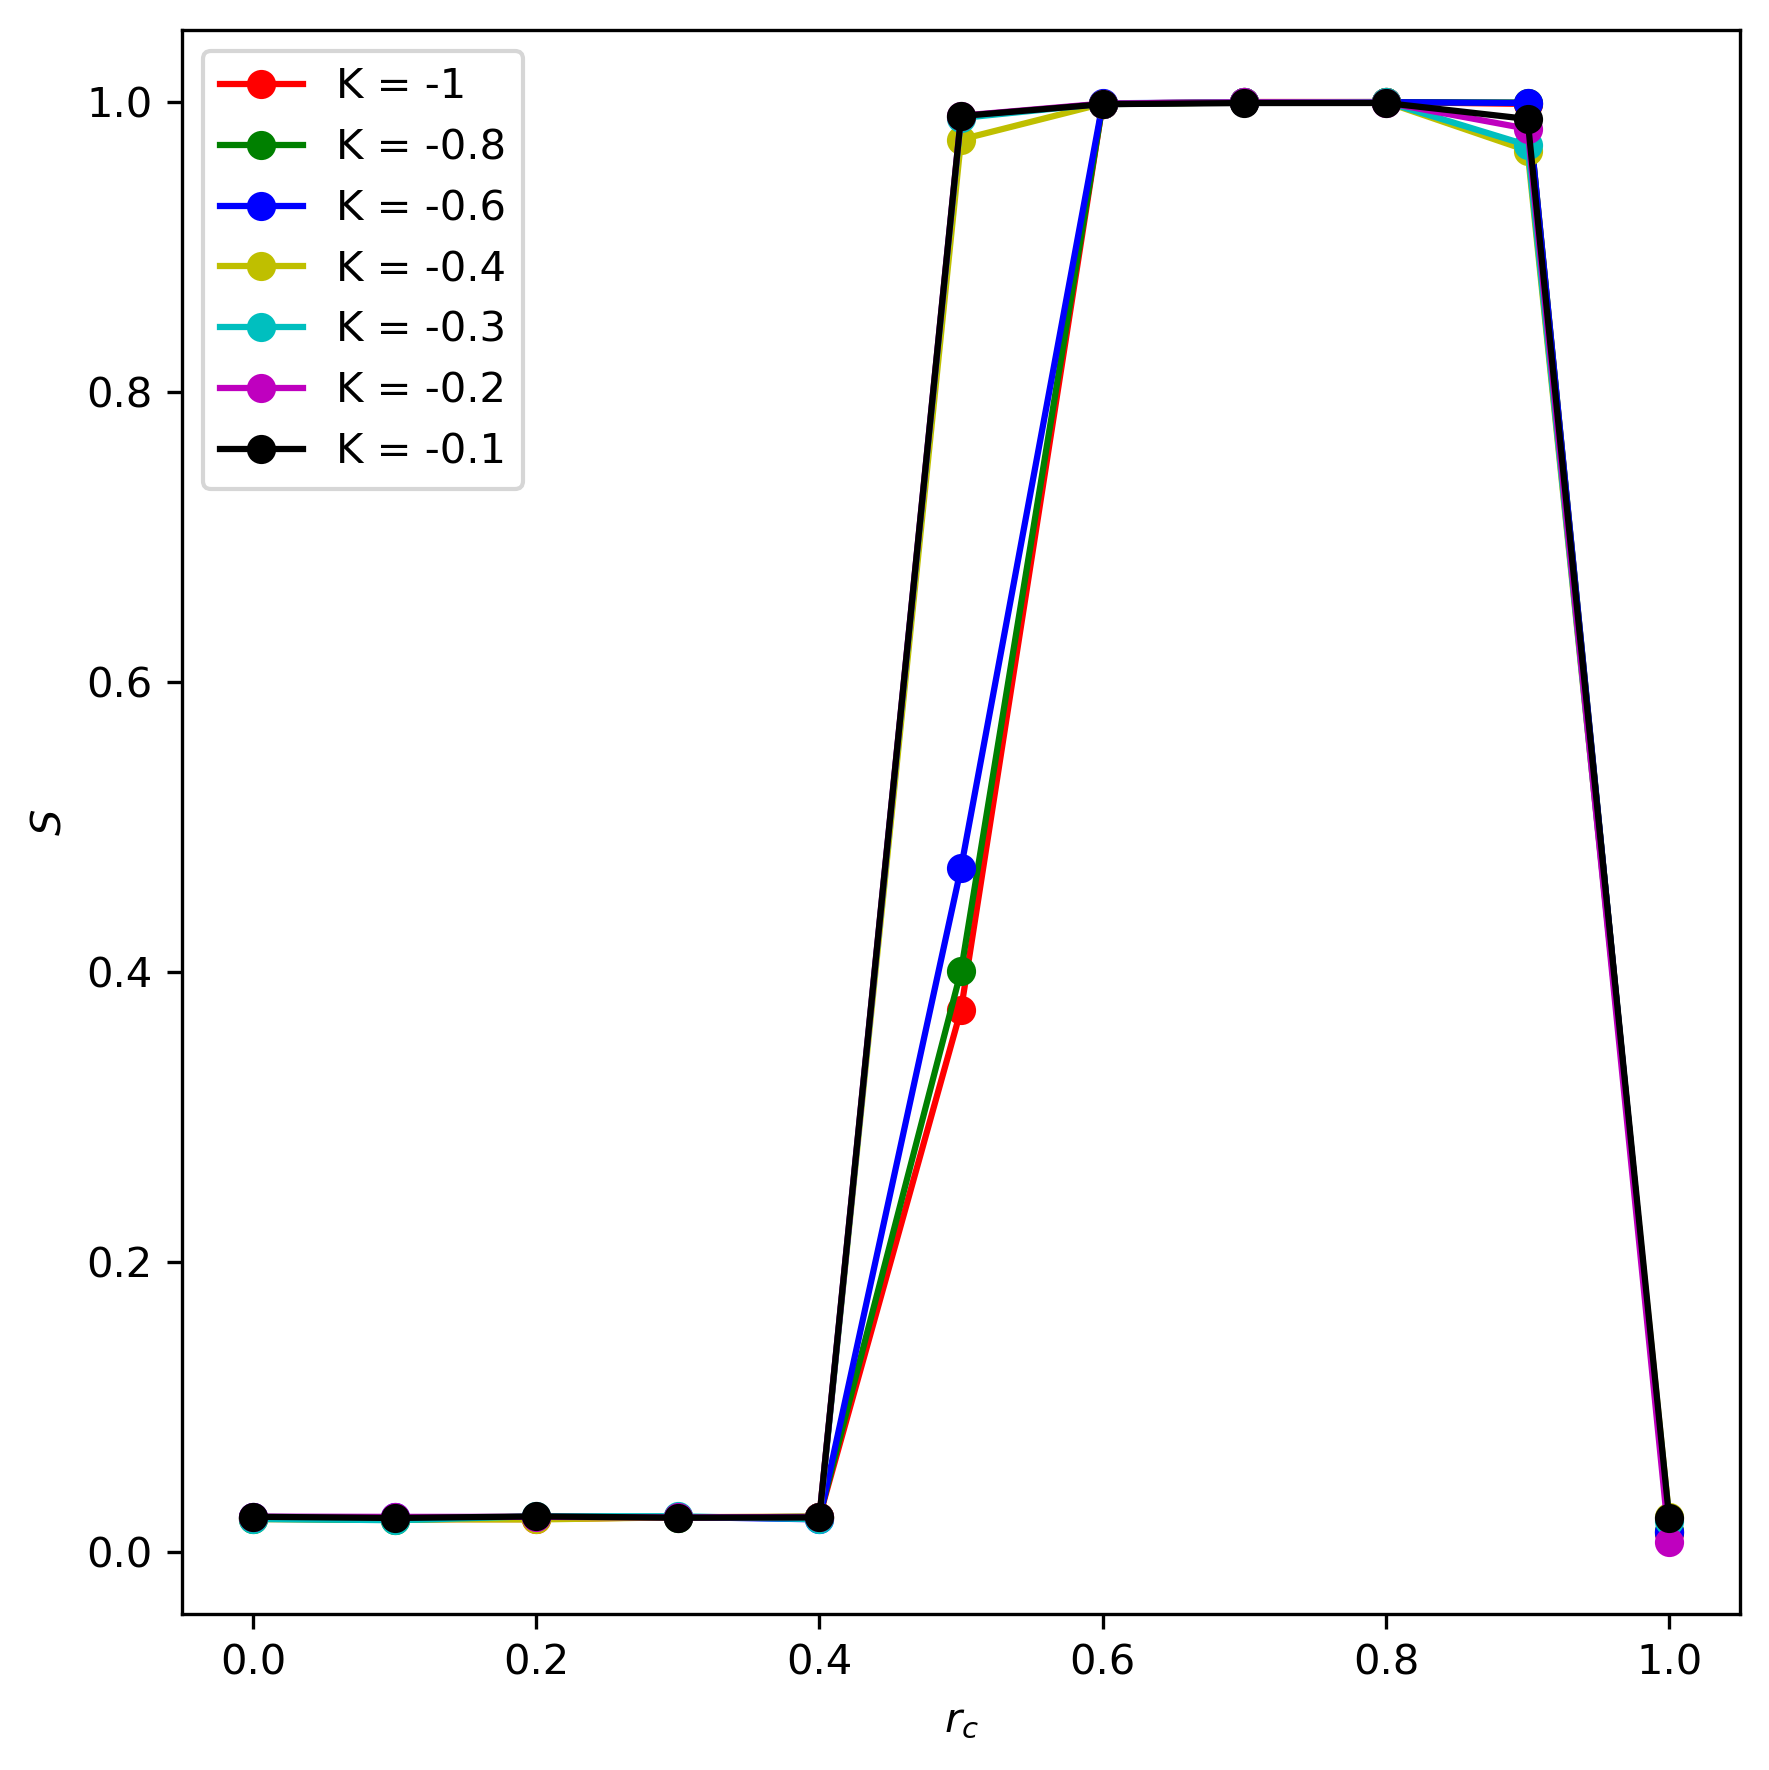

In [8]:
# 利用R_values画图，横坐标为r_c，纵坐标为R
fig, ax = plt.subplots(figsize=(6, 6), dpi = 300)# 默认像素为100，可以自己设置
ax.plot(S_values_1.index, S_values_1.values, marker='o',color='r',label = 'K = -1')
ax.plot(S_values_2.index, S_values_2.values, marker='o',color='g',label = 'K = -0.8')
ax.plot(S_values_3.index, S_values_3.values, marker='o',color='b',label = 'K = -0.6')
ax.plot(S_values_4.index, S_values_4.values, marker='o',color='y',label = 'K = -0.4')
ax.plot(S_values_5.index, S_values_5.values, marker='o',color='c',label = 'K = -0.3')
ax.plot(S_values_6.index, S_values_6.values, marker='o',color='m',label = 'K = -0.2')
ax.plot(S_values_7.index, S_values_7.values, marker='o',color='k',label = 'K = -0.1')


# 增加图例，红色线为K=0.9，绿色线
ax.legend()

ax.set_xlabel("$r_c$")
ax.set_ylabel("$S$")
plt.tight_layout()
plt.show()

### S对K

In [ ]:
J = 0.1
range_K = np.arange(-1, 1.01, 0.1)
# 设置一个存储R的DataFrame
S_values_1 = pd.DataFrame(index=range_K, columns=[0])
S_values_2 = pd.DataFrame(index=range_K, columns=[0])
S_values_3 = pd.DataFrame(index=range_K, columns=[0])
S_values_4 = pd.DataFrame(index=range_K, columns=[0])
S_values_5 = pd.DataFrame(index=range_K, columns=[0])
S_values_6 = pd.DataFrame(index=range_K, columns=[0])
S_values_7 = pd.DataFrame(index=range_K, columns=[0])


for K in range_K:
    model = AdaptiveInteraction2D(agentsNum=100, dt=0.1, J=J, K = K, r_c=0.9,
                              distribution=None, savePath="F:/adaptive_data/data_identicalDis")
    sa = StateAnalysis(model)
    S = sa.cal_S
    S_values_1.loc[K, 0] = S

for K in range_K:
    model = AdaptiveInteraction2D(agentsNum=100, dt=0.1, J=J, K = K, r_c=0.8,
                              distribution=None, savePath="F:/adaptive_data/data_identicalDis")
    sa = StateAnalysis(model)
    S = sa.cal_S
    S_values_2.loc[K, 0] = S

for K in range_K:
    model = AdaptiveInteraction2D(agentsNum=100, dt=0.1, J=J, K = K, r_c=0.7,
                              distribution=None, savePath="F:/adaptive_data/data_identicalDis")
    sa = StateAnalysis(model)
    S = sa.cal_S
    S_values_3.loc[K, 0] = S

for K in range_K:
    model = AdaptiveInteraction2D(agentsNum=100, dt=0.1, J=J, K = K, r_c=0.6,
                              distribution=None, savePath="F:/adaptive_data/data_identicalDis")
    sa = StateAnalysis(model)
    S = sa.cal_S
    S_values_4.loc[K, 0] = S

for K in range_K:
    model = AdaptiveInteraction2D(agentsNum=100, dt=0.1, J=J, K = K, r_c=0.5,
                              distribution=None, savePath="F:/adaptive_data/data_identicalDis")
    sa = StateAnalysis(model)
    S = sa.cal_S
    S_values_5.loc[K, 0] = S

for K in range_K:
    model = AdaptiveInteraction2D(agentsNum=100, dt=0.1, J=J, K = K, r_c=0.4,
                              distribution=None, savePath="F:/adaptive_data/data_identicalDis")
    sa = StateAnalysis(model)
    S = sa.cal_S
    S_values_6.loc[K, 0] = S

for K in range_K:
    model = AdaptiveInteraction2D(agentsNum=100, dt=0.1, J=J, K = K, r_c=0.3,
                              distribution=None, savePath="F:/adaptive_data/data_identicalDis")
    sa = StateAnalysis(model)
    S = sa.cal_S
    S_values_7.loc[K, 0] = S

    



In [ ]:
S_values_1

In [ ]:
# 利用S_values画图，横坐标为K，纵坐标为S
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(S_values_1.index, S_values_1.values, marker='o',color='r',label = 'rc = 0.9')
ax.plot(S_values_2.index, S_values_2.values, marker='o',color='g',label = 'rc = 0.8')
ax.plot(S_values_3.index, S_values_3.values, marker='o',color='b',label = 'rc = 0.7')
ax.plot(S_values_4.index, S_values_4.values, marker='o',color='y',label = 'rc = 0.6')
ax.plot(S_values_5.index, S_values_5.values, marker='o',color='c',label = 'rc = 0.5')
ax.plot(S_values_6.index, S_values_6.values, marker='o',color='m',label = 'rc = 0.4')
ax.plot(S_values_7.index, S_values_7.values, marker='o',color='k',label = 'rc = 0.3')


# 增加图例，红色线为K=0.9，绿色线
ax.legend()

ax.set_xlabel("$K$")
ax.set_ylabel("$S$")
plt.tight_layout()
plt.show()

## R

In [ ]:
J = 0.1
K = 0.9
range_r_c = np.arange(0,1.01,0.1)
# 设置一个存储R的DataFrame
R_values_1 = pd.DataFrame(index=range_r_c, columns=[0])
R_values_2 = pd.DataFrame(index=range_r_c, columns=[0])
R_values_3 = pd.DataFrame(index=range_r_c, columns=[0])
R_values_4 = pd.DataFrame(index=range_r_c, columns=[0])
R_values_5 = pd.DataFrame(index=range_r_c, columns=[0])

for r_c in range_r_c:
    model = AdaptiveInteraction2D(agentsNum=100, dt=0.1, J=J, K = K, r_c=r_c,
                              distribution=None, savePath="F:/adaptive_data/data_identicalDis")
    sa = StateAnalysis(model)
    R = sa.cal_R
    R_values_1.loc[r_c, 0] = R


In [ ]:
J = 0.1
K = 0.6
range_r_c = np.arange(0,1.01,0.1)

for r_c in range_r_c:
    model = AdaptiveInteraction2D(agentsNum=100, dt=0.1, J=J, K = K, r_c=r_c,
                              distribution=None, savePath="F:/adaptive_data/data_identicalDis")
    sa = StateAnalysis(model)
    R = sa.cal_R
    R_values_2.loc[r_c, 0] = R

In [ ]:
J = 0.1
K = 0.3
range_r_c = np.arange(0,1.01,0.1)

for r_c in range_r_c:
    model = AdaptiveInteraction2D(agentsNum=100, dt=0.1, J=J, K = K, r_c=r_c,
                              distribution=None, savePath="F:/adaptive_data/data_identicalDis")
    sa = StateAnalysis(model)
    R = sa.cal_R
    R_values_3.loc[r_c, 0] = R

In [ ]:
J = 0.1
K = 0.1
range_r_c = np.arange(0,1.01,0.1)

for r_c in range_r_c:
    model = AdaptiveInteraction2D(agentsNum=100, dt=0.1, J=J, K = K, r_c=r_c,
                              distribution=None, savePath="F:/adaptive_data/data_identicalDis")
    sa = StateAnalysis(model)
    R = sa.cal_R
    R_values_4.loc[r_c, 0] = R

In [ ]:
J = 0.1
K = 0.5
range_r_c = np.arange(0,1.01,0.1)

for r_c in range_r_c:
    model = AdaptiveInteraction2D(agentsNum=100, dt=0.1, J=J, K = K, r_c=r_c,
                              distribution=None, savePath="F:/adaptive_data/data_identicalDis")
    sa = StateAnalysis(model)
    R = sa.cal_R
    R_values_5.loc[r_c, 0] = R

In [ ]:
# 利用R_values画图，横坐标为r_c，纵坐标为R
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(R_values_1.index, R_values_1.values, marker='o',color='r',label = 'K = 0.9')
ax.plot(R_values_2.index, R_values_2.values, marker='o',color='g',label = 'K = 0.6')
ax.plot(R_values_5.index, R_values_5.values, marker='o',color='purple',label = 'K = 0.5')
ax.plot(R_values_3.index, R_values_3.values, marker='o',color='b',label = 'K = 0.3')
ax.plot(R_values_4.index, R_values_4.values, marker='o',color='y',label = 'K = 0.1')

# 增加图例，红色线为K=0.9，绿色线
ax.legend()

ax.set_xlabel("$r_c$")
ax.set_ylabel("$R$")
plt.tight_layout()
plt.show()

In [ ]:
J = 0.1
range_r_c = np.arange(0,1.01,0.1)
R_values = {}
for i in range(1, 22):  # 从1到21
    R_values[f'R_values_{i}'] = pd.DataFrame(index=range_r_c, columns=[0])
 
# 定义 K 值的列表
K_values = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, -0.0, 
            -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9, -1.0]
 
# 使用循环来遍历 K 值，并创建模型、进行分析和存储结果
for i, K in enumerate(K_values, start=1):
    for r_c in range_r_c:
        model = AdaptiveInteraction2D(agentsNum=100, dt=0.1, J=J, K=K, r_c=r_c,
                                     distribution=None, savePath="F:/adaptive_data/data_identicalDis")
        sa = StateAnalysis(model)
        R = sa.cal_R  # 假设 cal_R 是一个方法，它返回所需的 R 值
        R_values[f'R_values_{i}'].loc[r_c, 0] = R

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
# ax.plot(R_values['R_values_1'].index, R_values['R_values_1'].values, marker='o',color='r',label = 'K = 1')
# ax.plot(R_values['R_values_2'].index, R_values['R_values_2'].values, marker='o',color='g',label = 'K = 0.9')
# ax.plot(R_values['R_values_3'].index, R_values['R_values_3'].values, marker='o',color='b',label = 'K = 0.8')
# ax.plot(R_values['R_values_4'].index, R_values['R_values_4'].values, marker='o',color='y',label = 'K = 0.7')
# ax.plot(R_values['R_values_5'].index, R_values['R_values_5'].values, marker='o',color='c',label = 'K = 0.6')
# ax.plot(R_values['R_values_6'].index, R_values['R_values_6'].values, marker='o',color='m',label = 'K = 0.5')
# ax.plot(R_values['R_values_7'].index, R_values['R_values_7'].values, marker='o',color='k',label = 'K = 0.4')
# ax.plot(R_values['R_values_8'].index, R_values['R_values_8'].values, marker='o',color='orange',label = 'K = 0.3')
# ax.plot(R_values['R_values_9'].index, R_values['R_values_9'].values, marker='o',color='purple',label = 'K = 0.2')
# ax.plot(R_values['R_values_10'].index, R_values['R_values_10'].values, marker='o',color='brown',label = 'K = 0.1')
# ax.plot(R_values['R_values_11'].index, R_values['R_values_11'].values, marker='o',color='pink',label = 'K = 0')
ax.plot(R_values['R_values_12'].index, R_values['R_values_12'].values, marker='o',color='r',label = 'K = -0.1')
ax.plot(R_values['R_values_13'].index, R_values['R_values_13'].values, marker='o',color='g',label = 'K = -0.2')
ax.plot(R_values['R_values_14'].index, R_values['R_values_14'].values, marker='o',color='b',label = 'K = -0.3')
ax.plot(R_values['R_values_15'].index, R_values['R_values_15'].values, marker='o',color='y',label = 'K = -0.4')
ax.plot(R_values['R_values_16'].index, R_values['R_values_16'].values, marker='o',color='c',label = 'K = -0.5')
ax.plot(R_values['R_values_17'].index, R_values['R_values_17'].values, marker='o',color='m',label = 'K = -0.6')
ax.plot(R_values['R_values_18'].index, R_values['R_values_18'].values, marker='o',color='k',label = 'K = -0.7')
ax.plot(R_values['R_values_19'].index, R_values['R_values_19'].values, marker='o',color='orange',label = 'K = -0.8')
ax.plot(R_values['R_values_20'].index, R_values['R_values_20'].values, marker='o',color='purple',label = 'K = -0.9')
ax.plot(R_values['R_values_21'].index, R_values['R_values_21'].values, marker='o',color='brown',label = 'K = -1')

ax.legend()
ax.set_xlabel("$r_c$")
ax.set_ylabel("$R$")
plt.tight_layout()
plt.show()

## $V=\frac{1}{N}\Sigma \sqrt{\dot{x}^2+\dot{y}^2}$

In [ ]:
def cal_V_matrix(N, K, range_r_c, range_J, savePath):
    V_values = pd.DataFrame(index=range_J, columns=range_r_c)

    for i, r_c in enumerate(range_r_c): 
        for j, J in enumerate(range_J):
            model = AdaptiveInteraction2D(agentsNum=N, dt=0.1, J=J, K = K, r_c=r_c, tqdm=True, savePath="data2")

            targetPath = f"./data2/{model}.h5"
            totalPointX = pd.read_hdf(targetPath, key="pointX")
            TNum = totalPointX.shape[0] // model.agentsNum

            totalPointX = totalPointX.values.reshape(TNum, model.agentsNum, 2)
            transient_index = int(0.9*totalPointX.shape[0])
            totalPoint_x = totalPointX[:, :, 0][transient_index:-1]
            totalPoint_y = totalPointX[:, :, 1][transient_index:-1]

            V = np.mean(np.sqrt(totalPoint_x**2 + totalPoint_y**2))

            V_values.loc[J, r_c] = V
    return V_values

In [ ]:
N = 200
range_r_c = np.linspace(0.1,1,10)
range_J = np.linspace(0.1,1,10)

V1 = cal_V_matrix(N, -0.5, range_r_c, range_J, "data2")
V2 = cal_V_matrix(N, -1, range_r_c, range_J, "data2")
V3 = cal_V_matrix(N, -2, range_r_c, range_J, "data2")

In [ ]:
V1_values = V1.loc[0.6]
V2_values = V2.loc[0.6]
V3_values = V3.loc[0.6]
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(V1_values.index, V1_values.values, marker='o')
ax.plot(V2_values.index, V2_values.values, marker='o')
ax.plot(V3_values.index, V3_values.values, marker='o')
ax.legend(["K=-0.5", "K=-1", "K=-2"])
ax.set_xlabel("$r_c$")
ax.set_ylabel("$V$")
plt.tight_layout()


In [ ]:
fig,axs = plt.subplots(2,2,figsize=(20,20))
V_values_numeric = V1.apply(pd.to_numeric, errors='coerce',)  # Convert non-numeric to NaN
V_values_numeric = V_values_numeric.fillna(0)  # Optional: Replace NaN with 0
ax1 = axs[0,0].matshow(V_values_numeric, cmap='viridis',interpolation='spline16')# 'viridis', 'viridis_r',
axs[0,0].set_xticks(np.arange(len(range_r_c)), range_r_c.round(2))
axs[0,0].set_yticks(np.arange(len(range_J)), range_J.round(2))
axs[0,0].set_xlabel("$r_c$")
axs[0,0].set_ylabel("$J$")
axs[0,0].set_title(f"$V-K={-0.5}$", fontsize=16)
fig.colorbar(ax1, ax=axs[0,0], fraction=0.046, pad=0.04)
axs[0,0].grid(False)

# V_values_numeric = V2.apply(pd.to_numeric, errors='coerce',)  # Convert non-numeric to NaN
# V_values_numeric = V_values_numeric.fillna(0)  # Optional: Replace NaN with 0
# ax2 = axs[0,1].matshow(V_values_numeric, cmap='viridis',interpolation='spline16')
# axs[0,1].set_xticks(np.arange(len(range_r_c)), range_r_c.round(2))
# axs[0,1].set_yticks(np.arange(len(range_J)), range_J.round(2))
# axs[0,1].set_xlabel("$r_c$")
# axs[0,1].set_ylabel("$J$")
# axs[0,1].set_title(f"$V-K={-1}$", fontsize=16)
# fig.colorbar(ax2, ax=axs[0,1], fraction=0.046, pad=0.04)

# V_values_numeric = V3.apply(pd.to_numeric, errors='coerce',)  # Convert non-numeric to NaN
# V_values_numeric = V_values_numeric.fillna(0)  # Optional: Replace NaN with 0
# ax3 = axs[1,0].matshow(V_values_numeric, cmap='viridis',interpolation='spline16')
# axs[1,0].set_xticks(np.arange(len(range_r_c)), range_r_c.round(2))
# axs[1,0].set_yticks(np.arange(len(range_J)), range_J.round(2))
# axs[1,0].set_xlabel("$r_c$")
# axs[1,0].set_ylabel("$J$")
# axs[1,0].set_title(f"$V-K={-2}$", fontsize=16)
# fig.colorbar(ax3, ax=axs[1,0], fraction=0.046, pad=0.04)



In [ ]:
N = 200
K = -0.5
dt=0.1
r_c = 0.1
J = 0.1
V_values = pd.DataFrame(index=range_J, columns=range_r_c)

model = AdaptiveInteraction2D(agentsNum=N, dt=dt, J=J, K = K, r_c=r_c, tqdm=True, savePath="data2")
targetPath = f"./data2/{model}.h5"
totalPointX = pd.read_hdf(targetPath, key="pointX")
TNum = totalPointX.shape[0] // model.agentsNum

totalPointX = totalPointX.values.reshape(TNum, model.agentsNum, 2)
transient_index = int(0.9*totalPointX.shape[0])
totalPoint_x = totalPointX[:, :, 0][transient_index:-1]
totalPoint_y = totalPointX[:, :, 1][transient_index:-1]

V = np.sqrt(totalPoint_x**2 + totalPoint_y**2).mean()

V



In [ ]:
N = 200
K= -0.5
range_r_c = np.linspace(0.1,1,10)
range_J = np.linspace(0.1,1,10)
V_values = pd.DataFrame(index=range_J, columns=range_r_c)



for i, r_c in enumerate(range_r_c): 
    for j, J in enumerate(range_J):
        model = AdaptiveInteraction2D(agentsNum=N, dt=0.1, J=J, K = K, r_c=r_c, tqdm=True, savePath="data2")

        targetPath = f"./data2/{model}.h5"
        totalPointX = pd.read_hdf(targetPath, key="pointX")
        TNum = totalPointX.shape[0] // model.agentsNum

        totalPointX = totalPointX.values.reshape(TNum, model.agentsNum, 2)
        transient_index = int(0.9*totalPointX.shape[0])
        totalPoint_x = totalPointX[:, :, 0][transient_index:-1]
        totalPoint_y = totalPointX[:, :, 1][transient_index:-1]

        V = np.mean(np.sqrt(totalPoint_x**2 + totalPoint_y**2))

        V_values.loc[J, r_c] = V

V_values

In [ ]:
V_values

In [ ]:
N = 400
range_K = np.linspace(-1, 1, 21)
r_c = 0.6
J = 0.5
V_values = pd.DataFrame(index=range_K, columns=[0])

for i, K in enumerate(range_K):
    model = AdaptiveInteraction2D(agentsNum=N, dt=0.1, J=J, K = K, r_c=r_c, tqdm=False, savePath="data8_model3")

    targetPath = f"./data8_model3/{model}.h5"
    totalPointX = pd.read_hdf(targetPath, key="pointX")
    TNum = totalPointX.shape[0] // model.agentsNum

    totalPointX = totalPointX.values.reshape(TNum, model.agentsNum, 2)
    transient_index = int(0.9*totalPointX.shape[0])
    totalPoint_x = totalPointX[:, :, 0][transient_index:-1]
    totalPoint_y = totalPointX[:, :, 1][transient_index:-1]

    V = np.mean(np.sqrt(totalPoint_x**2 + totalPoint_y**2))

    V_values.loc[K, 0] = V

# V_values的值乘以10的3次方
V_values = V_values*1e2
V_values.to_excel("V_values.xlsx")

# $\gamma$

In [ ]:
def find_gamma_single(sa):
    tolerance = 0.2
    gamma = 0
    phi = np.arctan2(sa.tranPosition_y, sa.tranPosition_x)
    for i in range(1, phi.shape[1]):
        y = phi[:,i]
        temp = np.sin(y)
        temp = (max (temp) - min(temp)) / 2.0
        if temp > 1-tolerance:
            gamma += 1
    return gamma/   phi.shape[1]

In [ ]:
model = AdaptiveInteraction2D(agentsNum=200, dt=0.1, J=0.9, K = -0.5, r_c=0.9, tqdm = True, savePath="data2")
sa = StateAnalysis(model)
find_gamma_single(sa)

In [ ]:
N = 200
range_r_c = np.linspace(0.1,1,10)
range_J = np.linspace(0.1,1,10)
gam1 = pd.DataFrame(index=range_J, columns=range_r_c)
for i, r_c in enumerate(range_r_c): 
    for j, J in enumerate(range_J):
        model = AdaptiveInteraction2D(agentsNum=N, dt=0.1, J=J, K = -0.5, r_c=r_c, savePath="data2")
        sa = StateAnalysis(model)
        gamma = find_gamma_single(sa)
        gam1.loc[J, r_c] = gamma
gam2 = pd.DataFrame(index=range_J, columns=range_r_c)
for i, r_c in enumerate(range_r_c):
    for j, J in enumerate(range_J):
        model = AdaptiveInteraction2D(agentsNum=N, dt=0.1, J=J, K = -1, r_c=r_c, savePath="data2")
        sa = StateAnalysis(model)
        gamma = find_gamma_single(sa)
        gam2.loc[J, r_c] = gamma
gam3 = pd.DataFrame(index=range_J, columns=range_r_c)
for i, r_c in enumerate(range_r_c):
    for j, J in enumerate(range_J):
        model = AdaptiveInteraction2D(agentsNum=N, dt=0.1, J=J, K = -2, r_c=r_c, savePath="data2")
        sa = StateAnalysis(model)
        gamma = find_gamma_single(sa)
        gam3.loc[J, r_c] = gamma

In [ ]:
gam1_values = gam1.loc[0.6]
gam2_values = gam2.loc[0.6]
gam3_values = gam3.loc[0.6]
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(gam1_values.index, gam1_values.values, marker='o')
ax.plot(gam2_values.index, gam2_values.values, marker='o')
ax.plot(gam3_values.index, gam3_values.values, marker='o')
ax.legend(["K=-0.5", "K=-1", "K=-2"])
ax.set_xlabel("$r_c$")
ax.set_ylabel("$gamma$")
plt.tight_layout()

In [ ]:
fig,axs = plt.subplots(2,2,figsize=(20,20))
gam1_values_numeric = gam1.apply(pd.to_numeric, errors='coerce',)  # Convert non-numeric to NaN
gam1_values_numeric = gam1_values_numeric.fillna(0)  # Optional: Replace NaN with 0
ax1 = axs[0,0].matshow(gam1_values_numeric, cmap='viridis',interpolation='spline16')# 'viridis', 'viridis_r',
axs[0,0].set_xticks(np.arange(len(range_r_c)), range_r_c.round(2))
axs[0,0].set_yticks(np.arange(len(range_J)), range_J.round(2))
axs[0,0].set_xlabel("$r_c$")
axs[0,0].set_ylabel("$J$")
axs[0,0].set_title(f"$gamma-K={-0.5}$", fontsize=16)
fig.colorbar(ax1, ax=axs[0,0], fraction=0.046, pad=0.04)
axs[0,0].grid(False)

In [ ]:
def find_gamma(N, K, range_r_c, range_J):
    gamma_values = pd.DataFrame(index=range_J, columns=range_r_c)

    for i, r_c in enumerate(range_r_c): 
        for j, J in enumerate(range_J):
            model = AdaptiveInteraction2D(agentsNum=N, dt=0.1, J=J, K = K, r_c=r_c, savePath="data2")

            targetPath = f"./data2/{model}.h5"
            totalPointX = pd.read_hdf(targetPath, key="pointX")
            TNum = totalPointX.shape[0] // model.agentsNum

            totalPointX = totalPointX.values.reshape(TNum, model.agentsNum, 2)
            transient_index = int(0.9*totalPointX.shape[0])
            totalPoint_x = totalPointX[:, :, 0][transient_index:-1]
            totalPoint_y = totalPointX[:, :, 1][transient_index:-1]

            tolerance = 0.1
            gamma = 0
            phi = np.arctan2(totalPoint_y, totalPoint_x)
            for i in range(1, phi.shape[1]):
                y = phi[:,i]
                temp = np.sin(y)
                temp = (max (temp) - min(temp)) / 2.0
                if temp > 1-tolerance:
                    gamma += 1

            gamma_values.loc[J, r_c] = gamma/phi.shape[1]
    return gamma_values

In [ ]:
N = 200
range_r_c = np.linspace(0.1,1,10)
range_J = np.linspace(0.1,1,10)

gam1 = find_gamma(N, -0.5, range_r_c, range_J)
gam1

In [ ]:
N = 200
range_r_c = np.linspace(0.1,1,10)
range_J = np.linspace(0.1,1,10)

gam1 = sa.find_gamma(N, -0.5, range_r_c, range_J, "data2")
# V2 = cal_V_matrix(N, -1, range_r_c, range_J, "data2")
# V3 = cal_V_matrix(N, -2, range_r_c, range_J, "data2")

# Local r

In [ ]:
# 

In [ ]:
model = AdaptiveInteraction2D(agentsNum=200, dt=0.1, J=1, K = -0.5, r_c=0.8, tqdm = True, savePath="data2")
sa = StateAnalysis(model)
# try_data = sa.tranPosition_x[-1]
# try_data_matrix = try_data - try_data[:, np.newaxis]
# result = np.sqrt((1+np.cos(try_data_matrix))/2)
# result.shape
sa.cal_local_r
model.omega
# 以model.omega为横轴，model.cal_local_r为纵轴画散点图
plt.scatter(model.omega, sa.cal_local_r)
plt.xlabel("omega")
plt.ylabel("local_r")


In [ ]:
model = AdaptiveInteraction2D(agentsNum=200, dt=0.1, J=1, K = -0.5, r_c=0.7, tqdm = True, savePath="data2")
sa = StateAnalysis(model)
# try_data = sa.tranPosition_x[-1]
# try_data_matrix = try_data - try_data[:, np.newaxis]
# result = np.sqrt((1+np.cos(try_data_matrix))/2)
# result.shape
sa.cal_local_r
model.omega
# 以model.omega为横轴，model.cal_local_r为纵轴画散点图
plt.scatter(model.omega, sa.cal_local_r)
plt.xlabel("omega")
plt.ylabel("local_r")


In [ ]:
model = AdaptiveInteraction2D(agentsNum=200, dt=0.1, J=0.5, K = -0.5, r_c=0.7, tqdm = True, savePath="data2")
sa = StateAnalysis(model)
# try_data = sa.tranPosition_x[-1]
# try_data_matrix = try_data - try_data[:, np.newaxis]
# result = np.sqrt((1+np.cos(try_data_matrix))/2)
# result.shape
sa.cal_local_r
model.omega
plt.scatter(model.omega, sa.cal_local_r)
plt.xlabel("omega")
plt.ylabel("local_r")

In [ ]:
model = AdaptiveInteraction2D(agentsNum=200, dt=0.1, J=0.5, K = -0.5, r_c=0.6, tqdm = True, savePath="data2")
sa = StateAnalysis(model)
# try_data = sa.tranPosition_x[-1]
# try_data_matrix = try_data - try_data[:, np.newaxis]
# result = np.sqrt((1+np.cos(try_data_matrix))/2)
# result.shape
sa.cal_local_r
model.omega
plt.scatter(model.omega, sa.cal_local_r)
plt.xlabel("omega")
plt.ylabel("local_r")

# 空间角与相位角的关系

In [ ]:
# 本地
targetPath = f"./data_identicalDis_Det/{model}.h5"
totalPositionX = pd.read_hdf(targetPath, key="positionX")
totalPhaseTheta = pd.read_hdf(targetPath, key="phaseTheta")
TNum = totalPositionX.shape[0] // model.agentsNum

totalPositionX = totalPositionX.values.reshape(TNum, model.agentsNum, 2)
totalPhaseTheta = totalPhaseTheta.values.reshape(TNum, model.agentsNum)
phi = np.arctan2(totalPositionX[:, :, 1], totalPositionX[:, :, 0])
final_phi = phi[-1]
final_theta = totalPhaseTheta[-1]
# finaltheta为横坐标，final_phi为纵坐标画散点图
plt.scatter(final_theta, final_phi)
plt.xlabel("theta")
plt.ylabel("phi")

# meantotalPhaseTheta = np.mean(totalPhaseTheta, axis=0)

FileNotFoundError: File ./data_identicalDis/Adaptive2D_J0.10_K-0.10_rc0.99_Num100.h5 does not exist

Text(0, 0.5, 'phi')

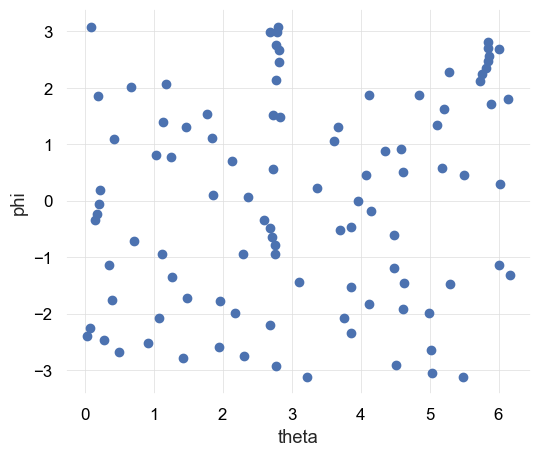

In [14]:
#磁盘
targetPath = f"F:/adaptive_data/data_NoneDis_det/{model}.h5"
totalPositionX = pd.read_hdf(targetPath, key="positionX")
totalPhaseTheta = pd.read_hdf(targetPath, key="phaseTheta")
TNum = totalPositionX.shape[0] // model.agentsNum

totalPositionX = totalPositionX.values.reshape(TNum, model.agentsNum, 2)
totalPhaseTheta = totalPhaseTheta.values.reshape(TNum, model.agentsNum)
phi = np.arctan2(totalPositionX[:, :, 1], totalPositionX[:, :, 0])
final_phi = phi[-1]
final_theta = totalPhaseTheta[-1]
# finaltheta为横坐标，final_phi为纵坐标画散点图
plt.scatter(final_theta, final_phi)
plt.xlabel("theta")
plt.ylabel("phi")

# meantotalPhaseTheta = np.mean(totalPhaseTheta, axis=0)


In [ ]:
final_theta.shape

In [15]:
def draw_phase_spatial_angle_mp4(model,mp4path,step=1):
    phi = np.arctan2(totalPositionX[:,:, 1], totalPositionX[:,:, 0])
    def plot_frame(i):
        pbar.update(1)
        phi_dot = phi[i]
        phaseTheta_dot = totalPhaseTheta[i]
        fig.clear()
        ax1 = fig.add_subplot(1, 1, 1)

        scatter = ax1.scatter(phi_dot, phaseTheta_dot,s=10)
        ax1.set_xlim(-np.pi, np.pi)
        ax1.set_ylim(0,2* np.pi)
        ax1.set_xlabel("$\phi$")
        ax1.set_ylabel("$\Theta$")

    frames = np.arange(0, totalPositionX.shape[0], step)
    pbar = tqdm(total=len(frames))
    fig = plt.figure(figsize=(5, 5))
    ani = ma.FuncAnimation(fig, plot_frame, frames=frames, interval = 50,repeat=True)
    ani.save(f"{mp4path}/{model}.mp4", dpi=200)

  0%|          | 0/1601 [00:00<?, ?it/s]

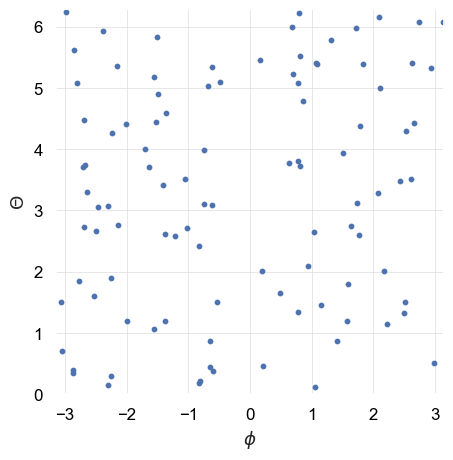

In [16]:
draw_phase_spatial_angle_mp4(model,mp4path="PSangel",step=1)

# A+-的分析

In [ ]:
N = 100
J = 0.1
K = -0.6
r_c = 0.5

model = AdaptiveInteraction2D(agentsNum=N, dt=0.1, J=J, K = K, r_c=r_c,
                                  distribution=None, savePath="F:/adaptive_data/data_identicalDis")

targetPath = f"F:/adaptive_data/data_identicalDis/{model}.h5"
totalPositionX = pd.read_hdf(targetPath, key="positionX")
totalPhaseTheta = pd.read_hdf(targetPath, key="phaseTheta")
totalA_ij = pd.read_hdf(targetPath, key="A_ij")
TNum = totalPositionX.shape[0] // model.agentsNum

totalPositionX = totalPositionX.values.reshape(TNum, model.agentsNum, 2)
transient_index = int(0.9*totalPositionX.shape[0])
totalPosition_x = totalPositionX[:, :, 0][transient_index:-1]
totalPosition_y = totalPositionX[:, :, 1][transient_index:-1]
totalPhaseTheta = totalPhaseTheta.values.reshape(
    TNum, model.agentsNum)[transient_index:-1]
totalA_ij = totalA_ij.values.reshape(TNum, model.agentsNum, model.agentsNum)[transient_index:-1]
# 对totalA_ij的时间平均
totalA_ij = totalA_ij.mean(axis=0)

# totalA_ij = totalA_ij.values.reshape(TNum, model.agentsNum, model.agentsNum)[-1]


In [ ]:
totalA_ij.shape

In [ ]:
# A+为totalA_ij里正值的和，A-为totalA_ij里负值的绝对值的和
# A_plus = totalA_ij[totalA_ij>0].sum()
A_plus = totalA_ij[totalA_ij>0].sum()/model.agentsNum**2
A_minus = - totalA_ij[totalA_ij<0].sum()/model.agentsNum**2
print(A_minus)
print(A_plus)
print(A_plus+A_minus)

In [ ]:
N = 100
J = 0.1
K = 0.5
r_c = np.arange(0,1.01,0.1)
A_plus_values = pd.DataFrame(index=r_c, columns=[0])
A_minus_values = pd.DataFrame(index=r_c, columns=[0])
S_values = pd.DataFrame(index=r_c, columns=[0])
R_values = pd.DataFrame(index=r_c, columns=[0])

for i, r_c in enumerate(r_c):
    model = AdaptiveInteraction2D(agentsNum=N, dt=0.1, J=J, K = K, r_c=r_c,
                                  distribution=None, savePath="F:/adaptive_data/data_identicalDis")

    sa = StateAnalysis(model)
    R = sa.cal_R
    R_values.loc[r_c, 0] = R
    S = sa.cal_S
    S_values.loc[r_c, 0] = S

    targetPath = f"F:/adaptive_data/data_identicalDis/{model}.h5"
    totalA_ij = pd.read_hdf(targetPath, key="A_ij")
    TNum = totalA_ij.shape[0] // model.agentsNum

    totalA_ij = totalA_ij.values.reshape(TNum, model.agentsNum, model.agentsNum)
    transient_index = int(0.9*totalA_ij.shape[0])
    totalA_ij = totalA_ij[transient_index:-1]
    totalA_ij = totalA_ij.mean(axis=0)
    A_plus = totalA_ij[totalA_ij>0].sum()/model.agentsNum**2
    A_minus = - totalA_ij[totalA_ij<0].sum()/model.agentsNum**2
    A_plus_values.loc[r_c, 0] = A_plus
    A_minus_values.loc[r_c, 0] = A_minus

# 以r_c为横轴，A_plus,A_minus为纵轴画散点图.A_plus的marker为上三角，A_minus的marker为下三角
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(A_plus_values.index, A_plus_values.values, marker='^', label = 'A+',color='b')
ax.plot(A_minus_values.index, A_minus_values.values, marker='v', label = 'A-',color='b')
ax.plot(S_values.index, S_values.values, marker='o', label = 'S', color='r', linestyle='--')
ax.plot(R_values.index, R_values.values, marker='o', label = 'R', color='y', linestyle='--')
ax.legend()
ax.set_xlabel("$r_c$")
ax.set_ylabel("$A$")
plt.tight_layout()
plt.show()

# FileName

In [ ]:
import os
import re

path = "./data3"
files = os.listdir(path)
for file in files:
    if file.endswith(".h5"):
        new_name = re.sub(r"rc(\d+\.\d+)", lambda x: f"rc{float(x.group(1)):.2f}", file)
        os.rename(f"{path}/{file}", f"{path}/{new_name}")
